Build a regression model.

In [2]:
# Load Packages
#!pip install requests
import requests
import json
import re
#!pip install pandas
import pandas as pd
import os # use this to access your environment variables
#!pip install plotly
import plotly.express as px
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install scipy
from scipy.stats import ttest_ind
import sqlite3
#!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
#!pip install statsmodels
import statsmodels.api as sm

In [3]:
# Model Building 
# Dependent Variable - Total Bikes in use
# Independent Variables -Avg_POI_Count, Yelp_Price_Category, Yelp_Avg_Rating, Yelp_Avg_Review_Count
complete_df = pd.read_csv(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\data\Merged_Data_17th.csv")

model_df = complete_df[['Total_Bikes_In_Use', 'Avg_POI_Count', 'Yelp_Price_Category', 'Yelp_Avg_Rating', 'Yelp_Avg_Review_Count']]

model_df.describe(include = 'all')

# Check for NAs
na_col_count = model_df.isna().sum(axis = 0)
na_col_count

model_df.info()

df_encoded = pd.get_dummies(model_df, columns=['Yelp_Price_Category'], drop_first=True)

# Check data types
print(df_encoded.dtypes)
# Check for missing values
print(df_encoded.isnull().sum())

print(df_encoded.shape)
print(model_df.shape)

# Add a constant term for the intercept
X = sm.add_constant(df_encoded[['Avg_POI_Count', 'Yelp_Price_Category_Expensive', 'Yelp_Avg_Rating', 'Yelp_Avg_Review_Count']])

# Fit the regression model
model = sm.OLS(model_df['Total_Bikes_In_Use'], X.astype(float)).fit()
model.summary()
# Values of R-squared and Adjusted R-squared are very low. None of the factors is significantly contributing to the variation Total Bikes in Use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total_Bikes_In_Use     248 non-null    int64  
 1   Avg_POI_Count          248 non-null    float64
 2   Yelp_Price_Category    248 non-null    object 
 3   Yelp_Avg_Rating        248 non-null    float64
 4   Yelp_Avg_Review_Count  248 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.8+ KB
Total_Bikes_In_Use                 int64
Avg_POI_Count                    float64
Yelp_Avg_Rating                  float64
Yelp_Avg_Review_Count            float64
Yelp_Price_Category_Expensive       bool
dtype: object
Total_Bikes_In_Use               0
Avg_POI_Count                    0
Yelp_Avg_Rating                  0
Yelp_Avg_Review_Count            0
Yelp_Price_Category_Expensive    0
dtype: int64
(248, 5)
(248, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Bikes_In_Use   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.126
Date:                Mon, 18 Dec 2023   Prob (F-statistic):              0.345
Time:                        06:13:08   Log-Likelihood:                -760.12
No. Observations:                 248   AIC:                             1530.
Df Residuals:                     243   BIC:                             1548.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            31.2747     14.178      2.206      0.028       3.348      59.201
Avg_POI_Count                     0.0571      0.121      0.472      0.638      -0.181       0.295
Yelp_Price_Category_Expensive     2.5187      2.401      1.049      0.295      -2.210       7.247
Yelp_Avg_Rating                  -5.2506      3.440     -1.527      0.128     -12.026       1.525
Yelp_Avg_Review_Count            -0.0005      0.002     -0.262      0.793      -0.004       0.003
==============================================================================
Omnibus:                        4.001   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.711
Skew:                           0.292   Prob(JB):                        0.156
Kurtosis:                       3.136   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# Fit the model with Scaling 


df_encoded = pd.get_dummies(model_df, columns=['Yelp_Price_Category'], drop_first=True)

# Extract features and target variable
X = df_encoded[['Avg_POI_Count', 'Yelp_Price_Category_Expensive', 'Yelp_Avg_Rating', 'Yelp_Avg_Review_Count']]
y = model_df['Total_Bikes_In_Use']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant term for the intercept
X_scaled = sm.add_constant(X_scaled)

# Fit the regression model
model = sm.OLS(y, X_scaled).fit()

# Display the summary of the regression
print(model.summary())
# Still no change in R-squared and Adjusted R-squared. None of the factors is significantly contributing to the variation Total Bikes in Use

                            OLS Regression Results                            
Dep. Variable:     Total_Bikes_In_Use   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.126
Date:                Mon, 18 Dec 2023   Prob (F-statistic):              0.345
Time:                        06:13:11   Log-Likelihood:                -760.12
No. Observations:                 248   AIC:                             1530.
Df Residuals:                     243   BIC:                             1548.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2863      0.333     30.917      0.0

Provide model output and an interpretation of the results. 

                            OLS Regression Results                            
Dep. Variable:     Total_Bikes_In_Use   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.126
Date:                Mon, 18 Dec 2023   Prob (F-statistic):              0.345
Time:                        06:13:15   Log-Likelihood:                -760.12
No. Observations:                 248   AIC:                             1530.
Df Residuals:                     243   BIC:                             1548.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2863      0.333     30.917      0.0

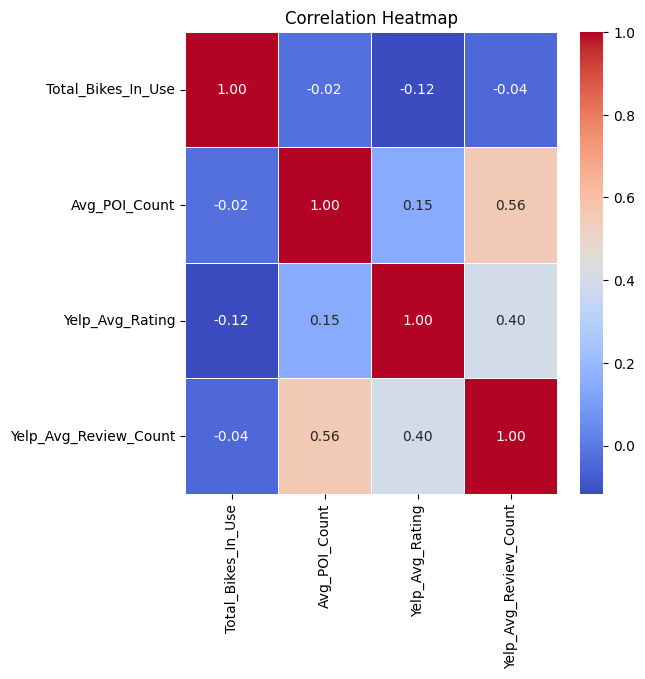

In [5]:
print(model.summary())

# The model, doesn't seem to provide a good fit to the data. 
# The coefficients are not statistically significant, and the R-squared values are low.
# Inclusion of additional parameters and more data might lead to a better performance.
# Even in correlation plot we can see there is no correlation of any of the quantitative fields with the dependent variable

# Calculate the correlation matrix
corr_matrix = model_df[['Total_Bikes_In_Use','Avg_POI_Count', 'Yelp_Avg_Rating', 'Yelp_Avg_Review_Count']].corr()

# Create a heatmap 
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Stretch

How can you turn the regression model into a classification model?